<a href="https://colab.research.google.com/github/Akter-Ashik/AI-Spam-Email-Detection-Using-Machine-Learning/blob/main/Lowpass_Papaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn
!pip install opencv-python
!pip install albumentations


In [16]:
# Import libraries
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from albumentations import (
    Compose, HorizontalFlip, Rotate, RandomBrightnessContrast,
    HueSaturationValue, Resize, RandomResizedCrop
)



In [17]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [18]:
# Function to apply low-pass filter with resizing
def apply_low_pass_filter(image, kernel_size=(5, 5)):
    if len(image.shape) == 3:  # Check if the image is RGB
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    # Apply Gaussian blur as a low-pass filter
    blurred = cv2.GaussianBlur(gray, kernel_size, 0)

    # Resize blurred image to match the original image size
    blurred_resized = cv2.resize(blurred, (image.shape[1], image.shape[0]))

    return blurred_resized

In [19]:
# Function to preprocess images with resizing and low-pass filter
def preprocess_image_low_pass(image_path, target_size=(224, 224), apply_low_pass=True):
    # Read and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Apply low-pass filter if specified
    if apply_low_pass:
        image = apply_low_pass_filter(image)  # Remove 'kernel_size' parameter here

    return image / 255.0  # Normalize to [0, 1]

In [20]:
data_folder = '/content/drive/MyDrive/Papaya - Dataset/Highpass - BG REMOVE'
image_files = os.listdir(data_folder)
images = [preprocess_image_low_pass(os.path.join(data_folder, file)) for file in image_files]


Image 1 - Original Mean: 0.1649, Original Std: 0.2751 | Low-Pass Mean: 0.1649, Low-Pass Std: 0.2738
Image 2 - Original Mean: 0.2062, Original Std: 0.2745 | Low-Pass Mean: 0.2062, Low-Pass Std: 0.2724
Image 3 - Original Mean: 0.1644, Original Std: 0.2748 | Low-Pass Mean: 0.1644, Low-Pass Std: 0.2736
Image 4 - Original Mean: 0.1458, Original Std: 0.2080 | Low-Pass Mean: 0.1458, Low-Pass Std: 0.2069


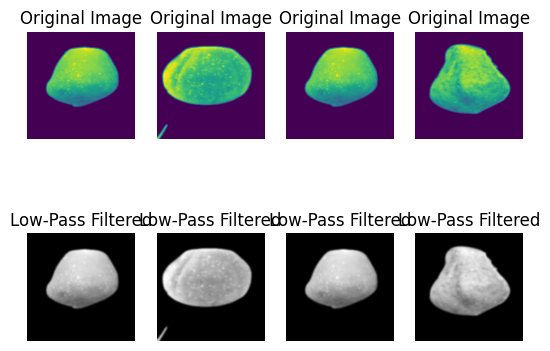

In [21]:
# Update the function name and call in the loop
for i in range(4):
    # Original Image
    original_image = np.clip(images[i], 0, 1)
    plt.subplot(2, 4, i+1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # Low-Pass Filtered Image
    low_pass_image = apply_low_pass_filter(images[i])
    plt.subplot(2, 4, i+5)
    plt.imshow(low_pass_image, cmap='gray')
    plt.title('Low-Pass Filtered')
    plt.axis('off')

    # Display statistics
    original_mean = np.mean(original_image)
    original_std = np.std(original_image)

    low_pass_mean = np.mean(low_pass_image)
    low_pass_std = np.std(low_pass_image)

    print(f"Image {i+1} - Original Mean: {original_mean:.4f}, Original Std: {original_std:.4f} | "
          f"Low-Pass Mean: {low_pass_mean:.4f}, Low-Pass Std: {low_pass_std:.4f}")

plt.show()